# "OKCupid Date-A-Scientist "
> "This projects utilises machine learning algorithms in an attempt to predict the zodiac sign of OkCupid users. "
>
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/OKCupid_Logo.svg.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## Introduction
In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

### Scope
This project utilises information from dating platform OkCupid {% fn 2 %} in order to answer specific problems.

### Project Goals
There are two primary goals for this project. The first is to perform EDA (scoping, initial analysis and investigation) on the data, which will then be cleaned and prepared for use in several machine learning algorithms. The second goal is to use this data to see if it is possible to determine  the zodiac sign of an user on OkCupid, using the information provided in their profile.
Zodiac signs have been identified as an important attribute in the dating world, and as a portion of profiles do not provide this information, it would be useful for OkCupid to predict missing zodiac signs, in order to increase the likelihood of successful dating matches.

### Data
The data is included within <code>profiles.csv</code>, which has been provided by Codecademy {% fn 3 %}.  The columns each contain answers to a multiple choice question or a short-essay style question, with each row representing an OkCupid user/profile.   No. of rows and columns.
### Analysis
####### WRITE AT END

### Results and Evaluation
####### WRITE AT END

{{ 'OkCupid' [link](https://wwww.okcupid.com) | fndetail: 2}}
{{ 'Codecademy' [link](https://wwww.codecademy.com) | fndetail: 3}}

## Initial

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

### Loading the dataframe



In [2]:
okc = pd.read_csv(r'profiles.csv')
(okc.head(5))

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#print(okc.columns)
#print(okc.dtypes)
(okc.info())
print(f"Number of rows = {len(okc.age)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The data provided has the following columns, which provide multiple choice answers:

* **body_type** - categorical variable
* **diet** - categorical variable
* **drinks** - categorical variable
* **drugs** - categorical variable
* **education** - categorical variable
* **ethnicity** - categorical variable
* **height** - continuous variable
* **income** - continuous variable
* **job** - categorical variable
* **last_online** - date variable
* **offspring** - categorical variable
* **orientation** - categorical variable
* **pets** - categorical variable
* **religion** - categorical variable
* **sex** - categorical variable
* **sign** - categorical variable
* **smokes** - categorical variable
* **speaks** - categorical variable
* **status** - categorical variable

And a set of open short-answer responses to :

* **essay0** - My self-summary
* **essay1** - What I’m doing with my life
***essay2** - I’m really good at…
* **essay3** - The first thing people usually notice about me…
* **essay4** - Favorite books, movies, show, music, and food
* **essay5** - The six things I could never do without
* **essay6** - I spend a lot of time thinking about…
* **essay7** - On a typical Friday night I am…
* **essay8** - The most private thing I am willing to admit
* **essay9** - You should message me if…

Changing the essay question columns into easier to understand variable names

In [4]:
okc.rename(columns={'essay0' : 'self_summary', 'essay1' : 'life_plans', 'essay2': 'good_at', 'essay3' : 'notice_about', 'essay4' : 'favourites', 'essay5' : 'do_without', 'essay6' : 'think_about', 'essay7' : 'friday', 'essay8' : 'private', 'essay9' : 'message'}, inplace=True)
(okc.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites',
       'do_without', 'think_about', 'friday', 'private', 'message',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

An initial brief look at the numerical data within the dataframe

In [5]:
(okc.describe())


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


## Exploring the data
### Zodiac sign data
First we will take a look at the zodiac sign data within the dataframe.




In [6]:
okc.sign.nunique()

48

There appears to be 48 answers to the 'What is your zodiac sign?' question.
As we know there are only 12 possible signs, this data must be looked at more closely.


In [7]:
okc.sign.unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

The data contains information about how important a zodiac sign is to the user for a potential match.  Whilst this is interesting information, 48 different answers will make the analysis time-consuming, so the sign will be extracted into a new column.
'The signs are quantified with the importance of zodiac signs to an OkCupid user. Whilst this is interesting information, intially it is best to remove this data and place the cleaned zodiac sign in a new column. Creating a new column means the sign importance data is retained for future use, if required.

In [8]:
okc['sign_clean']= okc.sign.str.split(' ').str[0]
okc.sign_clean.nunique()

12

The 12 unique zodiac signs are now correctly labelled in the okc.sign_clean column.
The below plot shows the amount of each zodiac sign.  The data appears fairly balanced, with capricorn representing slightly less of the users.

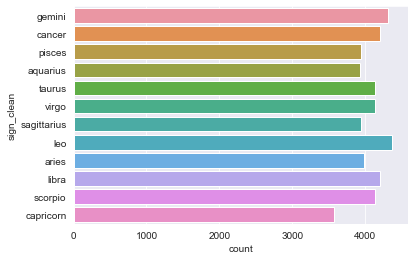

In [9]:
sns.countplot(data=okc, y='sign_clean')
plt.show()

## Continuous variables

Now we have looked at the zodiac sign data, let's explore the data that will be used to predict zodiac signs.

### Age range



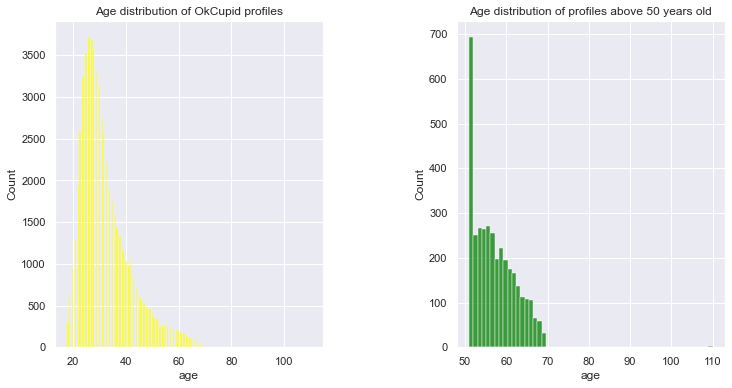

In [10]:
sns.set_style('darkgrid')
sns.set_context('notebook')
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(12,6))
plt.subplots_adjust(wspace=0.5)
ax1 = sns.histplot(okc.age, color='yellow', ax=ax1)
ax1.set_title('Age distribution of OkCupid profiles')
ax2 = sns.histplot(okc.age[okc.age > 50], color='green', ax=ax2)
ax2.set_title('Age distribution of profiles above 50 years old')
plt.show()

In [11]:
print(f'Mean age: {round(okc.age.mean(), 2)} ')
print(f'90th percentile: {okc.age.quantile(0.9)}')
print(f'Maximum age: {okc.age.max()} ')
print(f'Minimum age: {okc.age.min()} ')

Mean age: 32.34 
90th percentile: 46.0
Maximum age: 110 
Minimum age: 18 


The mean age of users is 32 years old, with 90% of the data lying below 46 years. The maximum age is 110 years old, which is either impressive, someone didn't want to disclose their age, or is an error.  This outlier causes the already left-skewed data to be further skewed.  Therefore, the two outliers, at 109 and 110 are best removed in order to minimise their effect on the total distribution of the data, and this the statistical analysis.

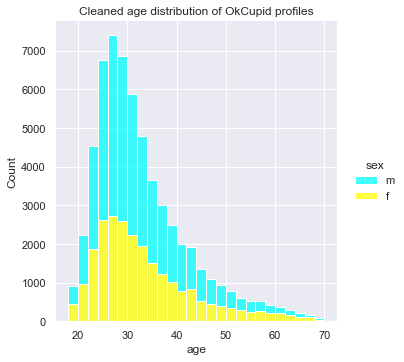

In [12]:
okc = okc[okc.age < 75]
sns.displot(data=okc, x="age", hue="sex", multiple = "stack", palette=['cyan', 'yellow'], kind='hist', binwidth=2)
plt.title('Cleaned age distribution of OkCupid profiles')
plt.show()


The plot shows that the age distribution for males and females is very similar - but also indicates that more males use dating applications

### Height

In [13]:
#collapse-output
print(okc.height.value_counts())


70.0    6074
68.0    5449
67.0    5353
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      19
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: height, dtype: int64


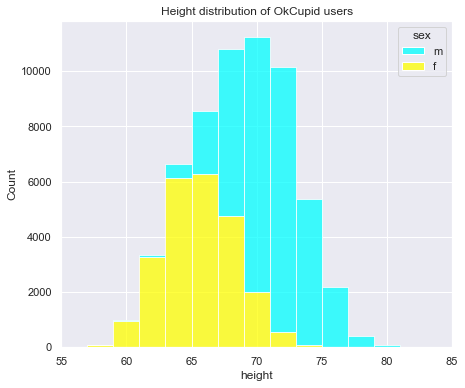

In [14]:
fig, (ax1) = plt.subplots(figsize=(7, 6))
sns.histplot(data=okc, x="height", hue="sex", binwidth=2, multiple = "stack", palette=['cyan', 'yellow'], ax=ax1)
ax1.set_xlim(55, 85)
plt.title('Height distribution of OkCupid users')
plt.show()

In [15]:
print(f'Minimum female height: {okc.height[okc.sex == "f"].min()} inches')
print(f'Minimum male height: {okc.height[okc.sex == "m"].min()} inches')
print(f'Maximum female height: {okc.height[okc.sex == "f"].max()} inches')
print(f'Maximum female height: {okc.height[okc.sex == "m"].max()} inches')
print(f'Average female height: {round(okc.height[okc.sex == "f"].mean(),2)} inches')
print(f'Average male height: {round(okc.height[okc.sex == "m"].mean(),2)} inches')

Minimum female height: 4.0 inches
Minimum male height: 1.0 inches
Maximum female height: 95.0 inches
Maximum female height: 95.0 inches
Average female height: 65.1 inches
Average male height: 70.44 inches


The minimum heights listed are 4 inches and 1 inches for females and males, respectively. We can assume that people did not want to list their height.  As heights for both males and females are normally distributed the small values will be left in - perhaps a certain zodiac sign prefers not to disclose their height.
The average height for females is 65 inches, or 5ft 5in and the average height for males is  5ft 10.5in.

### Income

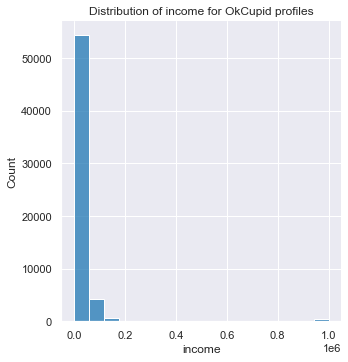

In [16]:
sns.displot(okc.income)
plt.title('Distribution of income for OkCupid profiles')
plt.show()

In [17]:

okc_no_income =(okc.income == -1).value_counts()
percent_no_income = (okc_no_income[1] / (okc_no_income[0] + okc_no_income[1])) * 100

print(okc_no_income)
print(percent_no_income)

True     48440
False    11504
Name: income, dtype: int64
80.80875483784867



It appears that most people, 81 %, prefer not to disclose their income in their dating profile.  This could be for several reasons such as it is often seen as crass to discuss income, or that people do not want money to be a factor in choosing a date. Given this lack of information, income will not be considered when applying models to the data.

## Discrete variables
Now we have looked at the continuous variables above, the next section will discuss the discrete variables, which make up the majority of the data.

### Sex
The gender distribution of the OkCupid profiles has been looked at earlier, and shows that there is a larger proportion of males to females.

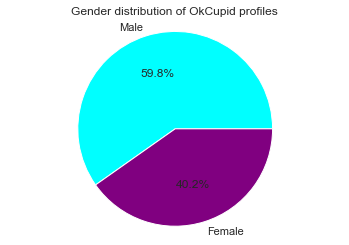

In [18]:

plt.pie(okc.sex.value_counts(), labels=['Male', 'Female'], colors=['cyan', 'purple'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Gender distribution of OkCupid profiles')
plt.show()



In [76]:
# function for plotting countplots to investigate the variables
def plotting_tool(df, x, width, height):
    plt.figure(figsize=[width, height])
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    for i in range(len(x)):
            plt.subplot(1, len(x), i+1)
            sns.countplot(data=df, y=x[i])
            plt.title(f'{x[i]}')
            plt.ylabel('')


### Diet and body
OkCupid can list their body type and diet choices in their profiles. The diet answers have qualifying information such as "strictly" or "mostly".  This information is removed into a new column, diet_clean, in order to simplify this variable.


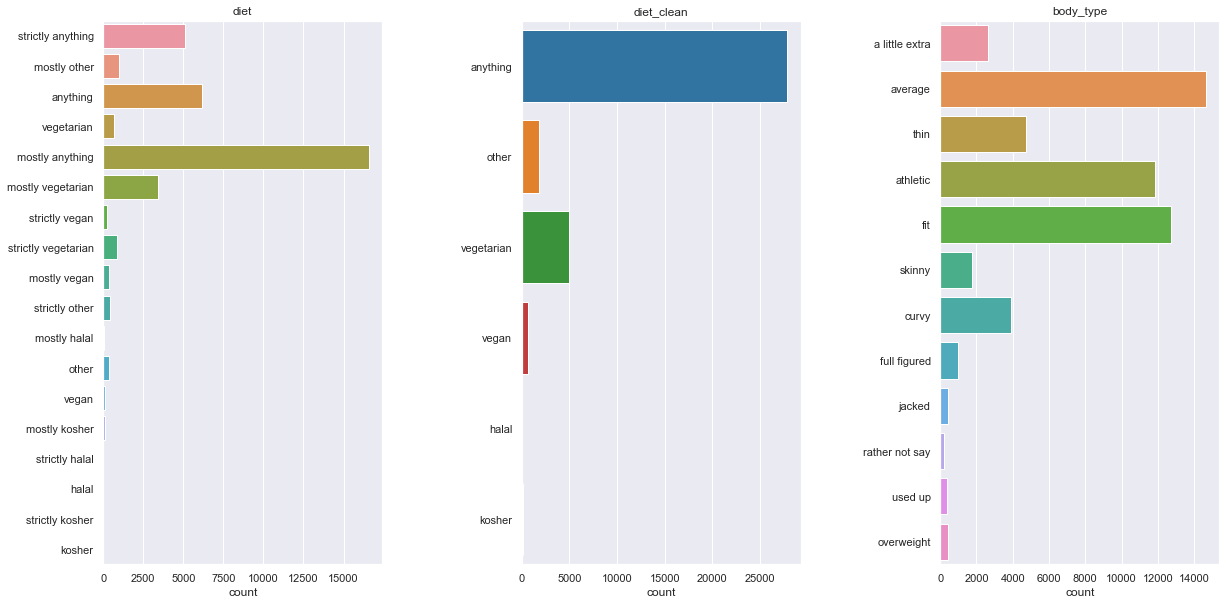

In [77]:
#print('cleaning the data to remove the qualifying information')
okc['diet_clean'] = okc.diet.str.split(' ').str[-1]
#print(okc.diet_clean)

diet_body = ['diet', 'diet_clean', 'body_type']
plotting_tool(okc, diet_body, 20, 10)

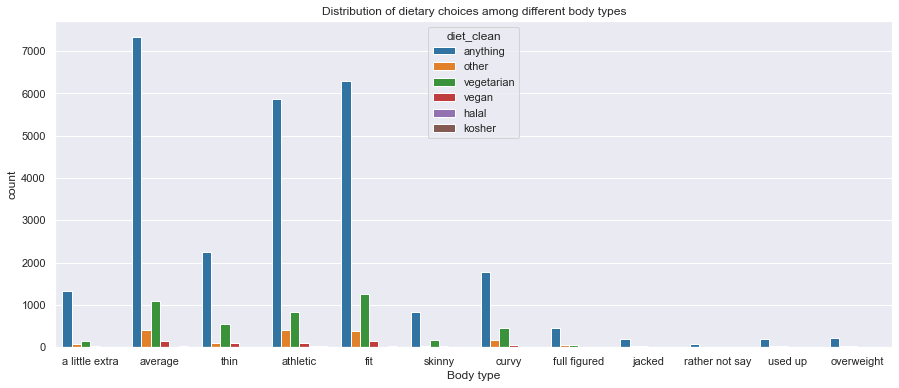

In [21]:
f, ax=plt.subplots(figsize=(15,6))
ax = sns.countplot(data=okc, x = 'body_type', hue='diet_clean')
ax.set_title('Distribution of dietary choices among different body types')
plt.xlabel('Body type')
plt.show()

The majority of users are omnivores, with the next most prevalent choice being vegetarian.  This is reflected in the relationship between diet and body type, with the majority dietary choice of each body type being omnivore and the second being vegetarian.

### Lifestyle choices:
Could a users smoking, drinking and drug habits predict their zodiac sign?


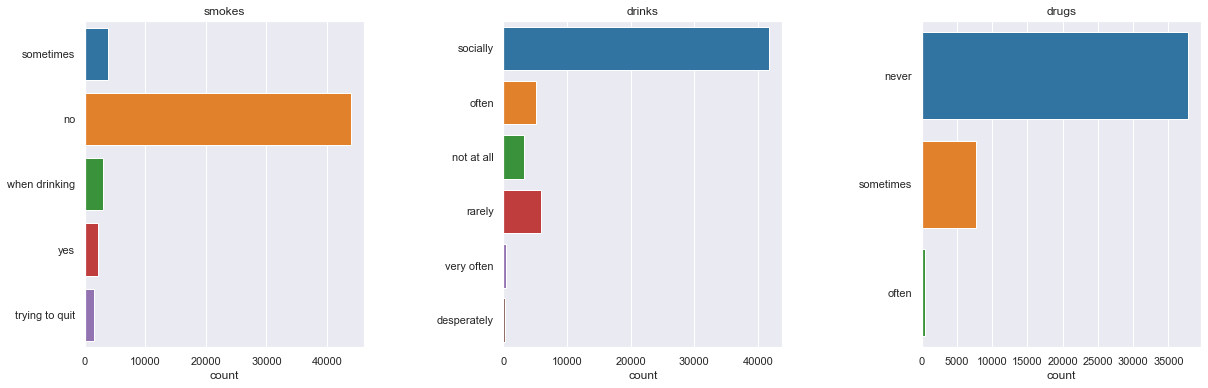

In [22]:
lifestyle_choices = ['smokes', 'drinks', 'drugs']
plotting_tool(okc, lifestyle_choices, 20, 6)

In [23]:
non_smoker = (okc.smokes == 'no').value_counts()
smoke_percent = round((non_smoker[1] / (non_smoker[1] + non_smoker[0])) * 100, 2)
social_drinker = (okc.drinks == 'socially').value_counts()
drinker_percent = round((social_drinker[1] / (social_drinker[1] + social_drinker[0])) * 100, 2)
uses_drugs = (okc.drugs == 'never').value_counts()
drugs_percent = round((uses_drugs[1] / (uses_drugs[1] + uses_drugs[0])) * 100, 2)
print(f'Percentage of users that drink socially {drinker_percent}%')
print(f'Percentage of users that never use drugs {drugs_percent}%')
print(f'Percentage of users that do not smoke {smoke_percent}%')


Percentage of users that drink socially 69.7%
Percentage of users that never use drugs 62.93%
Percentage of users that do not smoke 73.23%


The data shows that the majority of users (~ 70 %) drink socially, do not use drugs or smoke.

### Education and employment



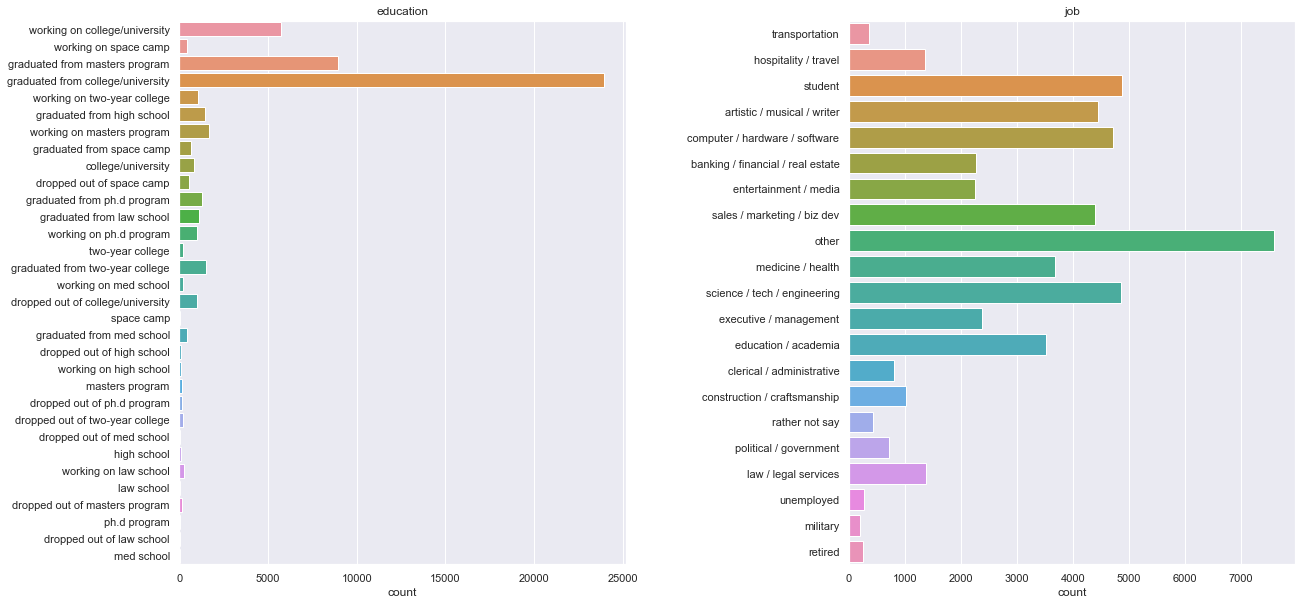

In [24]:
attrib2=['education', 'job']
plotting_tool(okc, attrib2, 20, 10)

In [25]:
#collapse_output
print(okc.education.value_counts())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1682
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

There are a lot of options within the education column, with the majority of answers pointing to user graduating from or attending college/university. As the variable is dominated by people attending/completing college, this variable will not be used within the model.  It is of note that space camp seems to be unusually popular.
There is a range of employments, with no one industry dominating the answers, therefore this can be included in the model.

### Pets and orientation

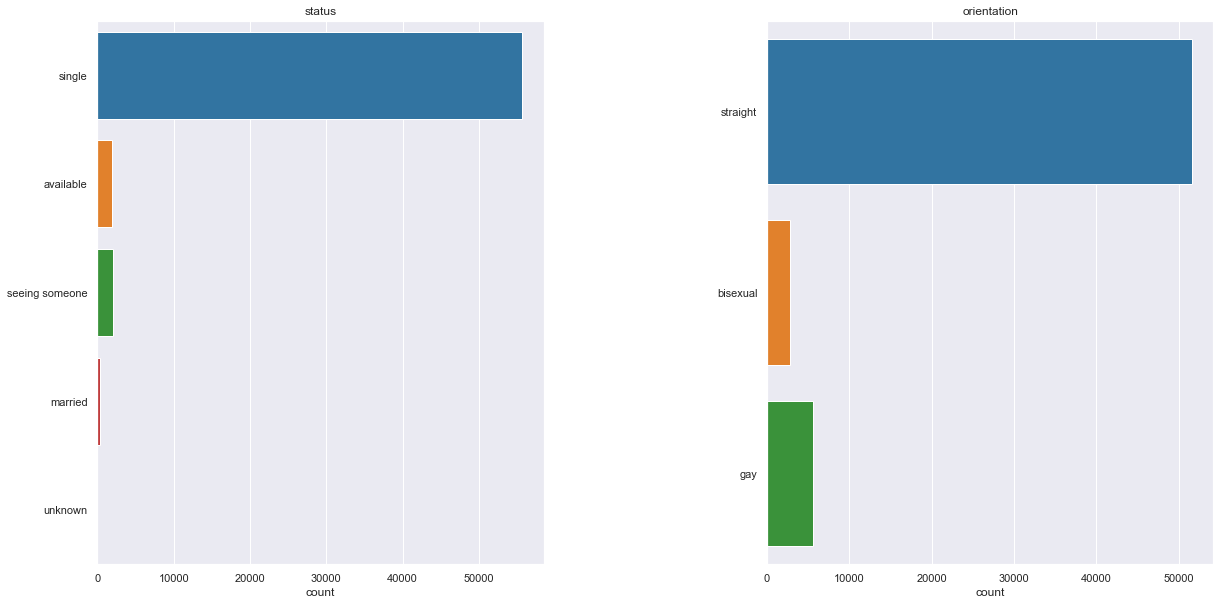

In [26]:
rel_status = ['status', 'orientation']
plotting_tool(okc, rel_status, 20, 10)

In [27]:
single = (okc.status == 'single').value_counts()
single_percent = round((single[1] / (single[1] + single[0])) * 100, 2)
print(f'The percentage of users that are single: {single_percent} %')
straight = (okc.orientation == 'straight').value_counts()
straight_percent = round((straight[1] / (straight[1] + straight[0])) * 100, 2)
print(f'The percentage of users that identify as straight: {straight_percent} %')

The percentage of users that are single: 92.91 %
The percentage of users that identify as straight: 86.09 %


93% of users identify as single, which is unsurprising as OkCupid is a dating site.  OkCupid also lets people identify as polyamorous or in open relationships, which accounts for the 7% that do not identify as single.  As the 'single' result dominates the answers, status will not be used in the model.
The poll in the US on sexual orientation {% fn 1 %} found that 7.1% of people identified as LGBT.  The OkCupid data shows 14% of people identify in this category.  As this is twice the poll average, orientation will be included within the model.

{{ 'Gallop poll' [link](https://news.gallup.com/poll/389792/lgbt-identification-ticks-up.aspx) | fndetail: 1}}

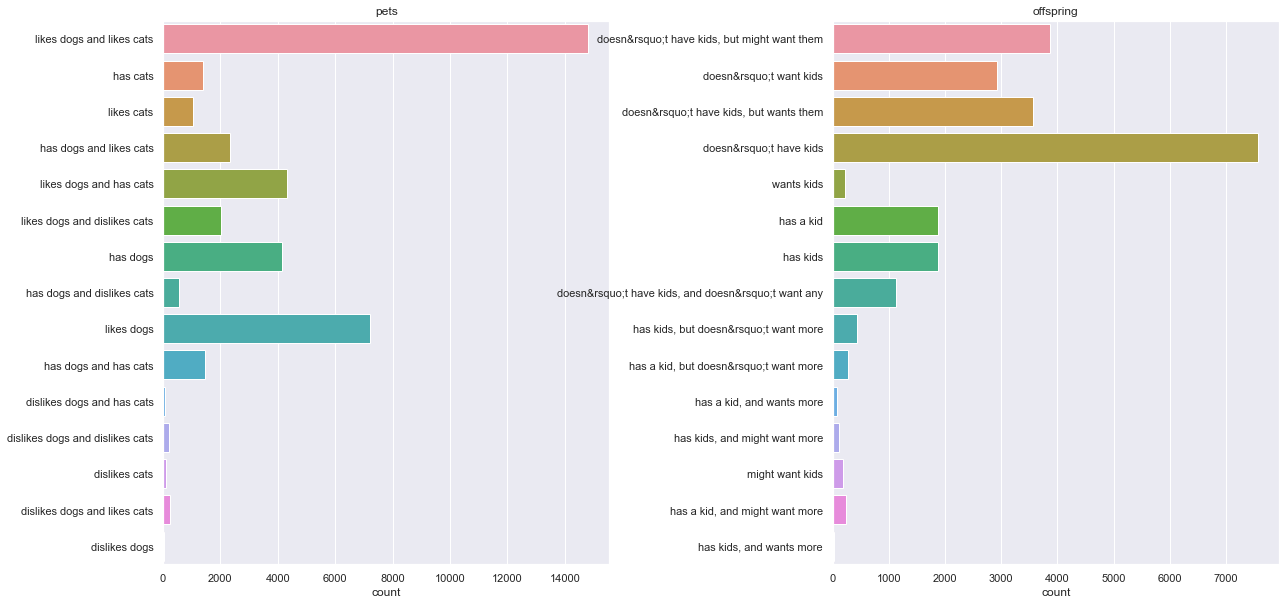

In [28]:
pet_status = ['pets', 'offspring']
plotting_tool(okc, pet_status, 20, 10)

Most users appear to like both cats and dogs, with those liking dogs making up the second most popular answer.  Most people do not have children (with qualifying information whether they want them in the future or not).  Given the average age and the fact it is a dating site, it is unsurprising most people do not have children.

### Religion

Cleaning the data to remove the qualifying information


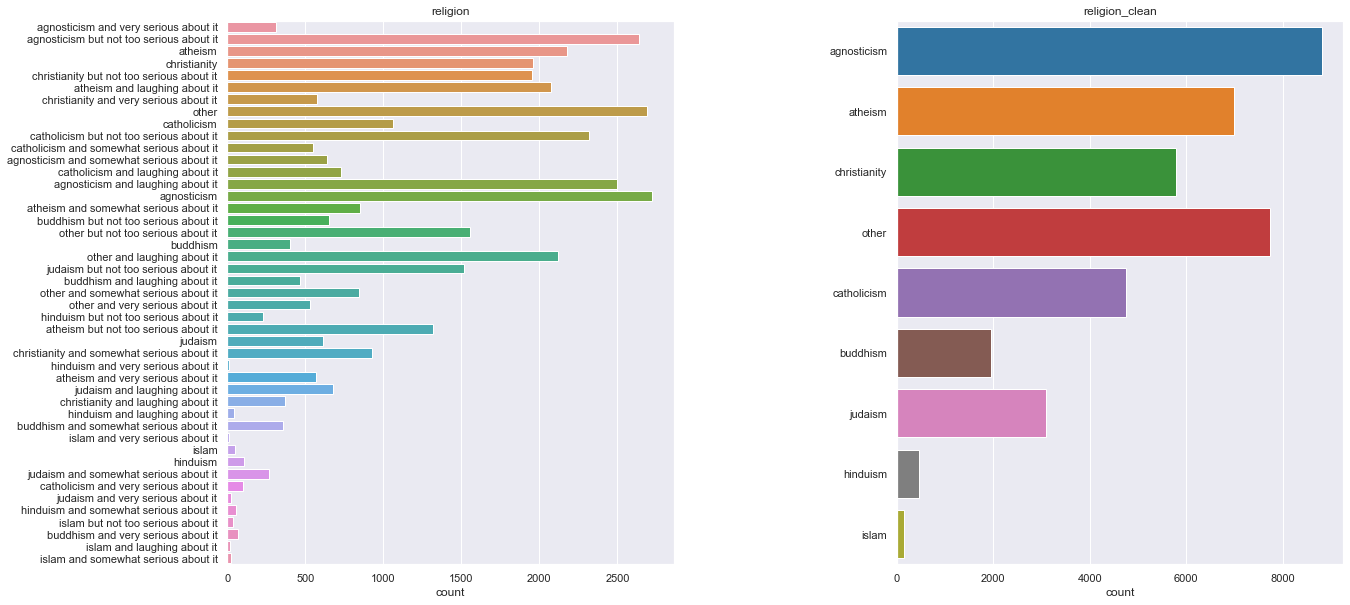

In [29]:
print('Cleaning the data to remove the qualifying information')
okc['religion_clean'] = okc.religion.str.split(' ').str[0]
#print(okc.religion_clean)

reli = ['religion', 'religion_clean']
plotting_tool(okc, reli, 20, 10)

As with the zodiac data, the religion column also contains qualifying information.  The data has been cleaned into a new column, religion_clean, to remove the qualifying data.  There seems to be a spread of religions, with no one answer dominating the data.

## Data preparation

### Preprocessing

In [30]:
columns_for_model = ['body_type', 'diet_clean', 'job', 'pets', 'religion_clean', 'orientation', 'sex', 'sign_clean']
print(len(okc.diet_clean))

59944


Number of null values in each column

In [31]:
nulls = (okc[columns_for_model].isnull().sum(axis = 0))
print(nulls)

nulls_values = []

for null in range(len(nulls)):
    nulls_values.append(nulls[null])
print(nulls_values)

body_type          5295
diet_clean        24394
job                8197
pets              19919
religion_clean    20225
orientation           0
sex                   0
sign_clean        11055
dtype: int64
[5295, 24394, 8197, 19919, 20225, 0, 0, 11055]


Producing a dataframe of values

In [32]:
null_comb = list(zip(columns_for_model, nulls_values))
print(null_comb)

null_df  = pd.DataFrame(null_comb, columns=['Column', 'NaN'])


null_df['% NaN values'] = round((null_df.NaN / (len(okc))) *100, 2)
display(null_df)

[('body_type', 5295), ('diet_clean', 24394), ('job', 8197), ('pets', 19919), ('religion_clean', 20225), ('orientation', 0), ('sex', 0), ('sign_clean', 11055)]


,Column,NaN,% NaN values
0,body_type,5295,8.83
1,diet_clean,24394,40.69
2,job,8197,13.67
3,pets,19919,33.23
4,religion_clean,20225,33.74
5,orientation,0,0.00
6,sex,0,0.00
7,sign_clean,11055,18.44


The null values within the data need to be addressed. As the model will be looking at zodiac signs, the NaN values in the sign_clean column are best removed.  As there are not a large number of null values (9% and 14%, respectively) in the body_type and job columns, these null values will also be dropped.

In [33]:
columns_to_remove_nan = ['sign_clean', 'body_type', 'job']
for n in columns_to_remove_nan:
    print(n)

sign_clean
body_type
job


In [34]:
def remove_nulls(df, cols, df_columns, df2):
    remaining_null = []
    for n in cols:
        df = df.dropna(subset=[n])
        drop_null = df[df_columns].isnull().sum(axis = 0)
        for value in drop_null:
            remaining_null.append(value)
        df2[f'NaN after {n} null drop'] = pd.Series(remaining_null)
        remaining_null = []

    return df, df2

In [35]:
okc_drop, null_df = (remove_nulls(okc, columns_to_remove_nan, columns_for_model, null_df))


In [36]:
print(len(okc_drop))
display(null_df)

40755


,Column,NaN,% NaN values,NaN after sign_clean null drop,NaN after body_type null drop,NaN after job null drop
0,body_type,5295,8.83,3938,0,0
1,diet_clean,24394,40.69,18770,16005,13995
2,job,8197,13.67,4961,4196,0
3,pets,19919,33.23,13717,12389,10446
4,religion_clean,20225,33.74,14130,12553,10488
5,orientation,0,0.00,0,0,0
6,sex,0,0.00,0,0,0
7,sign_clean,11055,18.44,0,0,0


If null values were removed from diet_clean, religion_clean and pets then a large chunk of the data would be removed (over 40%).


In [37]:
print(okc_drop.diet_clean.unique())
print(okc_drop.pets.unique())
print(okc_drop.religion_clean.unique())

['anything' 'other' 'vegetarian' nan 'vegan' 'halal' 'kosher']
['likes dogs and likes cats' 'likes cats' 'likes dogs and has cats' nan
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'has dogs and likes cats' 'likes dogs' 'has cats' 'has dogs and has cats'
 'dislikes dogs and has cats' 'dislikes dogs and dislikes cats'
 'dislikes cats' 'dislikes dogs and likes cats' 'dislikes dogs']
['agnosticism' nan 'atheism' 'christianity' 'catholicism' 'other'
 'buddhism' 'hinduism' 'judaism' 'islam']



Therefore, the null values are replaced with 'unknown' as perhaps certain zodiac signs have no opinion on pets, dietary or religious choices.

In [38]:

okc_drop =okc_drop.fillna('unknown')

In [39]:
print(okc_drop.diet_clean.unique())
print(okc_drop.pets.unique())
print(okc_drop.religion_clean.unique())

['anything' 'other' 'vegetarian' 'unknown' 'vegan' 'halal' 'kosher']
['likes dogs and likes cats' 'likes cats' 'likes dogs and has cats'
 'unknown' 'likes dogs and dislikes cats' 'has dogs'
 'has dogs and dislikes cats' 'has dogs and likes cats' 'likes dogs'
 'has cats' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']
['agnosticism' 'unknown' 'atheism' 'christianity' 'catholicism' 'other'
 'buddhism' 'hinduism' 'judaism' 'islam']


In [40]:
print(okc_drop[columns_for_model].isnull().sum(axis = 0))
okc_model_df = okc_drop[['body_type', 'diet_clean', 'job', 'pets', 'religion_clean', 'orientation', 'sex', 'sign_clean']]

body_type         0
diet_clean        0
job               0
pets              0
religion_clean    0
orientation       0
sex               0
sign_clean        0
dtype: int64


The data is now clear of null values.

### Dummy variables

The categorical data is ordinal, in that it does not follow a particular ranking or order. Therefore, in order to prepare this data for use in the models, features will be converted into dummies.

In [41]:
features = ['body_type', 'diet_clean', 'job', 'pets', 'religion_clean', 'orientation', 'sex']

okc_dummies = pd.get_dummies(data=okc_model_df, columns=features)
display(okc_dummies)
#print(okc_dummies.info())

,sign_clean,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,religion_clean_hinduism,religion_clean_islam,religion_clean_judaism,religion_clean_other,religion_clean_unknown,orientation_bisexual,orientation_gay,orientation_straight,sex_f,sex_m
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,pisces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,aquarius,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59936,virgo,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
59942,leo,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
59943,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
59944,leo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Labels
The zodiac signs are the labels for the model.  They will be converted into numerical values for use in the models.


In [42]:
okc_dummies['sign_labels'] = okc_dummies.sign_clean.astype('category').cat.codes
labels = okc_dummies[['sign_labels']]
labels_array = labels.squeeze().ravel()
print(labels_array)

[4 2 7 ... 8 5 4]


### Splitting the data


Import library to split the data for testing and training

In [43]:
from sklearn.model_selection import train_test_split

The data will be split 80% for training the model and 20% for validating the model

In [44]:
X_data = okc_dummies.iloc[:, 1:-1]
y_data = okc_dummies.iloc[:, 0:1]


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32604, 71)
(32604, 1)
(8151, 71)
(8151, 1)


Converting the y data into an array

In [45]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Models

### Logistic Regression

Logistic regression is a machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category.  These probabilities are used to classify/assign the observations to the more probable group.  An example of this is using a logistic regression model to predict the probability that an incoming email is spam.  If the probability is greater than 0.5, the email could automatically be sent to the spam folder.  The email is example is called binary classification as there are only two groups (i.e. spam or not spam).

As the zodiac data is not binary, a 'multinomial' argument can be passed to the model, so that it may classify more than 2 groups.

In [46]:
#import library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [47]:
logres_model = LogisticRegression(max_iter=4000, multi_class='multinomial')
logres_model.fit(X_train, y_train)
logres_model.predict(X_test)
logres_test_score = logres_model.score(X_test, y_test)

In [48]:
lr_perc_success =  round(logres_test_score * 100, 2)
labels_chart = logres_model.classes_
print(lr_perc_success)

8.5


The model was only 8.5% successful in predicting a zodiac sign.

# EXPLAIN CONFUSION MATRIX

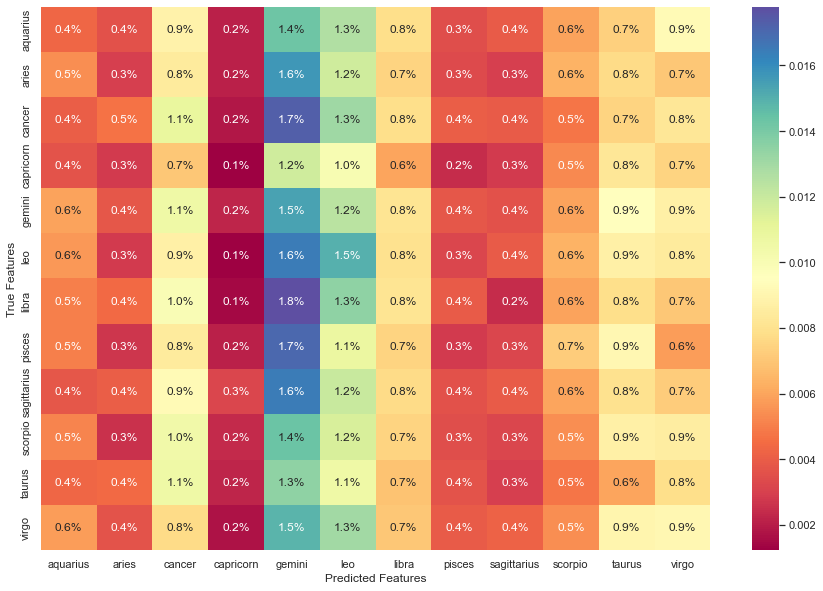

In [49]:
#confusion matrix
conf_mat = confusion_matrix(y_test, logres_model.predict(X_test))
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt = '.1%', cmap = 'Spectral', xticklabels=labels_chart, yticklabels=labels_chart)
plt.xlabel('Predicted Features')
plt.ylabel('True Features')
plt.show()


Logistic regression is generally used for continuous variable predictions not classification, therefore the lack of success above is unsurprising.

### K-Nearest Neighbour (KNN)

KNN is a classification algorithm with central idea that data points with similar attributes tend to fall into similar categories. The KNN algorithm utilises this 'feature similarity' to predict the values of unknown/new data points. Therefore, a new point (or point from the test set) is assigned a value based on how closely it resembles the points in the training set.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

The default number of neighbors within the algorithm is 5. As there are 12 zodiac signs, the model will initially be set to 12 nearest neighbors.

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train, y_train)
predict_knn = knn_model.predict(X_test)
success_rate = knn_model.score(X_test, y_test)
print(round(success_rate * 100,2))

8.7


Like with the logistic regression model, the success at predicting a zodiac sign is between 8 and 9 %.  This is, again, highly inaccurate, so the  measures of algorithm effectiveness are investigated below.

In [52]:
print(accuracy_score(y_test, predict_knn))
print(recall_score(y_test, predict_knn, average='weighted'))
print(precision_score(y_test, predict_knn, average='weighted'))
print(f1_score(y_test, predict_knn, average='weighted'))

0.08698319224635014
0.08698319224635014
0.08569285171615046
0.08313683542098019


The accuracy, recall, precision and F1 scores are all between 8 and 9%, indicating that the KNN algorithm is highly ineffective in predicting a users zodiac sign.

### Number of neighbours
The number of neighbors could affect the accuracy of the model.  Therefore, the model will be run with number of neighbors from 1 to 100, to see if the model can increase predictive accuracy, and also reveal the number of neighbors that gives the highest prediction success.

In [ ]:
accuracy_values = []
for k in range(1,100):
    knn_model_neighbor = KNeighborsClassifier(n_neighbors=k)
    knn_model_neighbor.fit(X_train, y_train)
    accuracy_values.append(knn_model_neighbor.score(X_test, y_test))

In [55]:
#collapse_output
print(accuracy_values)

[0.08808735124524598, 0.08808735124524598, 0.0866151392467182, 0.08722856091277144, 0.08894614157772053, 0.08722856091277144, 0.08955956324377377, 0.08992761624340571, 0.09176788124156546, 0.08955956324377377, 0.08894614157772053, 0.08698319224635014, 0.08857808857808858, 0.08636977058029689, 0.0858790332474543, 0.08710587657956079, 0.08735124524598209, 0.08906882591093117, 0.08845540424487792, 0.0858790332474543, 0.08538829591461171, 0.08428413691571586, 0.08354803091645197, 0.08146239725187093, 0.08551098024782235, 0.08403876824929457, 0.0851429272481904, 0.085633664581033, 0.08416145258250521, 0.08391608391608392, 0.08403876824929457, 0.08317997791682002, 0.08575634891424365, 0.08502024291497975, 0.08710587657956079, 0.08624708624708624, 0.0866151392467182, 0.08600171758066495, 0.0868605079131395, 0.08624708624708624, 0.08502024291497975, 0.08281192491718807, 0.08317997791682002, 0.08170776591829224, 0.08452950558213716, 0.08428413691571586, 0.08170776591829224, 0.08293460925039872,

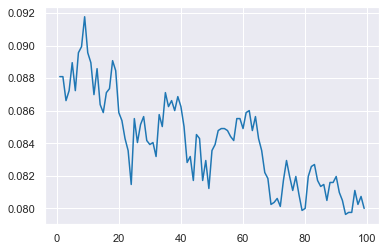

0.09176788124156546


In [54]:
k_values = range(1,100)
plt.plot(k_values, accuracy_values)
plt.show()
print(max(accuracy_values))

The most successful prediction was 9.2%, with 9 nearest neighbors.  This is still not a very successful model prediction, so another classification algorithm will be utilised.


### Decision Tree

A decision tree model can be used to predict a class or value of a target variable by learning simple decision rules which are inferred from the training data.  The number of trees is given by the n_estimators parameter.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_model = RandomForestClassifier(n_estimators=20)
forest_model.fit(X_train, y_train)
fmp = forest_model.predict(X_test)
print(forest_model.score(X_test, y_test))
print(forest_model.feature_importances_)

0.08698319224635014
[0.01761658 0.02440366 0.034896   0.01308826 0.02622226 0.00883834
 0.00405456 0.00454797 0.0024608  0.01118076 0.01946426 0.00409122
 0.03185408 0.00070407 0.00113173 0.01172725 0.02909837 0.00557809
 0.02011722 0.02176767 0.01311538 0.00817062 0.01782487 0.00631062
 0.01786773 0.01372034 0.0167995  0.01030071 0.01115196 0.02043002
 0.00282455 0.02297847 0.00727267 0.00596591 0.00308578 0.01979431
 0.01632696 0.02136993 0.0051356  0.00339018 0.00173194 0.00073115
 0.00264299 0.0012549  0.00285567 0.0115161  0.01847332 0.00440118
 0.01012335 0.01785895 0.00858035 0.02644505 0.01581362 0.01786513
 0.0305954  0.03061712 0.02179772 0.01761648 0.01408047 0.02203124
 0.01983381 0.00473154 0.00187229 0.01754518 0.02716358 0.03443707
 0.01008373 0.01495385 0.01896242 0.01853572 0.01816942]


### Number of trees
The number of trees could affect the accuracy of the model.  Therefore, the model will be run with number of trees from 1 to 100, to see if the model can increase predictive accuracy, and also reveal the number of trees that gives the highest prediction success.

In [57]:
accuracy_trees = []
for n in range(1,100):
    forest_model_trees = RandomForestClassifier(n_estimators=n)
    forest_model_trees.fit(X_train, y_train)
    accuracy_trees.append(forest_model_trees.score(X_test, y_test))

In [60]:
#collapse_output
print(accuracy_trees)

[0.08256655625076678, 0.08796466691203533, 0.08796466691203533, 0.08636977058029689, 0.08771929824561403, 0.0848975585817691, 0.0851429272481904, 0.08894614157772053, 0.08256655625076678, 0.09250398724082935, 0.08293460925039872, 0.085633664581033, 0.08673782357992885, 0.08906882591093117, 0.08759661391240339, 0.08379339958287327, 0.08477487424855847, 0.08600171758066495, 0.09287204024046129, 0.09201324990798675, 0.0858790332474543, 0.09005030057661637, 0.0868605079131395, 0.08992761624340571, 0.08992761624340571, 0.08477487424855847, 0.09041835357624832, 0.08440682124892651, 0.08992761624340571, 0.0866151392467182, 0.0868605079131395, 0.08845540424487792, 0.08735124524598209, 0.08600171758066495, 0.08845540424487792, 0.08906882591093117, 0.08735124524598209, 0.0848975585817691, 0.08710587657956079, 0.08968224757698443, 0.08698319224635014, 0.08784198257882468, 0.08821003557845664, 0.08870077291129923, 0.08465218991534781, 0.08771929824561403, 0.08735124524598209, 0.09041835357624832, 

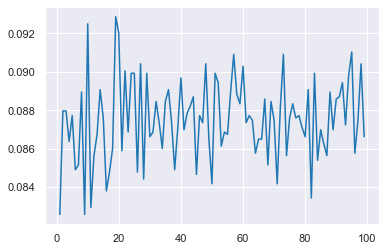

0.09287204024046129


In [59]:
n_values = range(1,100)
plt.plot(n_values, accuracy_trees)
plt.show()
print(max(accuracy_trees))

In [65]:
#collapse_all
print(accuracy_score(y_test, fmp))
print(recall_score(y_test, fmp, average='weighted'))
print(precision_score(y_test, fmp, average='weighted'))
print(f1_score(y_test, fmp, average='weighted'))

0.08698319224635014
0.08698319224635014
0.08727662217442483
0.08699617150534057


The decision tree model has no greater success than linear regression or k-nearest neighbor in predicting the zodiac sign of an OkCupid user, with all models having a success rate of >9 %.

## NLP and Naive Bayes

Naive Bayes classifiers are supervised machine learning algorithms that leverage a probabilistic theorem to make predictions and classifications. They are widely used for sentiment analysis (determining whether a given block of language expresses negative or positive feelings) and spam filtering.

Here a Naive Bayes classifier will be used to analyse the essay questions within the dataset to see if NLP has better success in predicting a users zodiac sign.

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lottes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lottes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lottes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Creating the dataframe and cleaning null values.

In [79]:
NB_df = okc[['sign_clean','self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites',
             'do_without', 'think_about', 'friday', 'private', 'message']].copy()

#remove null values

NB_df = NB_df.dropna(subset=['sign_clean','self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites',
                     'do_without', 'think_about', 'friday', 'private', 'message'])
print(NB_df.isnull().sum())
print(len(NB_df))

sign_clean      0
self_summary    0
life_plans      0
good_at         0
notice_about    0
favourites      0
do_without      0
think_about     0
friday          0
private         0
message         0
dtype: int64
26117


Defining functions which utilise regex in order to clean the text, such as removing symbols and extra white spaces.

In [80]:
def regex_function(text):
    return re.sub('<.*?>|\\n+|http\S+|(?<=&)(.*?)(?=;)|,|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@', ' ', text)

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text)

In [81]:
essay_list = ['self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites', 'do_without', 'think_about', 'friday', 'private', 'message']
for essay in essay_list:
    NB_df[essay] = NB_df[essay].apply(lambda x: regex_function(x))
    NB_df[essay] = NB_df[essay].apply(lambda x: remove_extra_whitespace(x))
    NB_df[essay] = NB_df[essay].str.lower()

In [85]:
(NB_df.head())

,sign_clean,self_summary,life_plans,good_at,notice_about,favourites,do_without,think_about,friday,private,message,sign_int
0,gemini,about me i would love to think that i was some...,currently working as an international agent fo...,making people laugh ranting about a good salti...,the way i look i am a six foot half asian half...,books absurdistan the republic of mice and men...,food water cell phone shelter,duality and humorous things,trying to find someone to hang out with i am d...,i am new to california and looking for someone...,you want to be swept off your feet you are tir...,0
5,taurus,i'm an australian living in san francisco but ...,building awesome stuff figuring out what's imp...,imagining random shit laughing at aforemention...,i have a big smile i also get asked if i'm wea...,books to kill a mockingbird lord of the rings ...,like everyone else i love my friends and famil...,what my contribution to the world is going to ...,out with my friends,i cried on my first day at school because a bi...,you're awesome,4
9,cancer,my names jake i'm a creative guy and i look fo...,i have an apartment i like to explore and chec...,i'm good at finding creative solutions to prob...,i'm short,i like some tv i love summer heights high and ...,music my guitar contrast good food my bike my ...,you should,send a message,and say hi,you can rock the bells,1
10,taurus,update i'm seeing someone so off the market i ...,i have three jobs i've been doing sound and li...,hugging kissing laughing motivating people mas...,my huge goofy smile,i'm constantly reading i read at what my frien...,family friends food women music reading,snowboarding food women goofy nerd stuff archi...,having dinner and drinks with friends and or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self este...,4
11,leo,i was born in wisconsin grew up in iowa and mo...,i'm currently the youngest member on an intern...,i'm really good at a little bit of everything ...,the way i dress some days it's hats other days...,books = yes avid reader moves = eternal sunshi...,guitar even if i don't play it all the time i'...,a little bit of everything but mostly social i...,hanging out with a small group of friends stay...,i'm picky when it comes to dating i know what ...,if you know who you are who you want where you...,6


Creating a dictionary of zodiac signs to map the dataframe to convert the signs into integers.

In [87]:
no_list = list(range(0,12))
print(no_list)
zodiac_list = list(okc_model_df.sign_clean.unique())
print(zodiac_list)
map_dict = dict(zip(zodiac_list, no_list))
print(map_dict)

#mapping the signs to integers
NB_df['sign_int'] = NB_df.sign_clean.map(map_dict)
(NB_df.head())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'sagittarius', 'leo', 'aries', 'libra', 'scorpio', 'virgo', 'capricorn']
{'gemini': 0, 'cancer': 1, 'pisces': 2, 'aquarius': 3, 'taurus': 4, 'sagittarius': 5, 'leo': 6, 'aries': 7, 'libra': 8, 'scorpio': 9, 'virgo': 10, 'capricorn': 11}


,sign_clean,self_summary,life_plans,good_at,notice_about,favourites,do_without,think_about,friday,private,message,sign_int
0,gemini,about me i would love to think that i was some...,currently working as an international agent fo...,making people laugh ranting about a good salti...,the way i look i am a six foot half asian half...,books absurdistan the republic of mice and men...,food water cell phone shelter,duality and humorous things,trying to find someone to hang out with i am d...,i am new to california and looking for someone...,you want to be swept off your feet you are tir...,0
5,taurus,i'm an australian living in san francisco but ...,building awesome stuff figuring out what's imp...,imagining random shit laughing at aforemention...,i have a big smile i also get asked if i'm wea...,books to kill a mockingbird lord of the rings ...,like everyone else i love my friends and famil...,what my contribution to the world is going to ...,out with my friends,i cried on my first day at school because a bi...,you're awesome,4
9,cancer,my names jake i'm a creative guy and i look fo...,i have an apartment i like to explore and chec...,i'm good at finding creative solutions to prob...,i'm short,i like some tv i love summer heights high and ...,music my guitar contrast good food my bike my ...,you should,send a message,and say hi,you can rock the bells,1
10,taurus,update i'm seeing someone so off the market i ...,i have three jobs i've been doing sound and li...,hugging kissing laughing motivating people mas...,my huge goofy smile,i'm constantly reading i read at what my frien...,family friends food women music reading,snowboarding food women goofy nerd stuff archi...,having dinner and drinks with friends and or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self este...,4
11,leo,i was born in wisconsin grew up in iowa and mo...,i'm currently the youngest member on an intern...,i'm really good at a little bit of everything ...,the way i dress some days it's hats other days...,books = yes avid reader moves = eternal sunshi...,guitar even if i don't play it all the time i'...,a little bit of everything but mostly social i...,hanging out with a small group of friends stay...,i'm picky when it comes to dating i know what ...,if you know who you are who you want where you...,6


Creating a corpus column for use in model, in which all essay questions per row are joined into one string.

In [88]:
NB_df['corpus'] = NB_df[essay_list].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

Writing the dataframe to csv, in order to check corpus is correct

In [ ]:
NB_df.to_csv('NB_df1.csv')

In [89]:
def NLP_processing(text):

    tokenized = word_tokenize(text)

    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(token)for token in tokenized]

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in stemmed]

    stop_words = set(stopwords.words('english'))
    output = [x for x in lemmatized if x not in stop_words]

    output = ' '.join(output)

    return output

In [90]:
NB_df.corpus = NB_df.corpus.map(lambda x: NLP_processing(x))

The data will be split into training and test sets before vectorizing - to avoid training data leaking into the test data.  The data will be split 75% for training, 25% for testing.


In [91]:
corpus = NB_df.corpus
labels = NB_df.sign_int

NB_corpus_train, NB_corpus_test, NB_labels_train, NB_labels_test = train_test_split(corpus, labels, test_size=0.25, random_state=100)

print(NB_corpus_train.shape)
print(NB_labels_train.shape)
print(NB_corpus_test.shape)
print(NB_labels_test.shape)


(19587,)
(19587,)
(6530,)
(6530,)


Creating and fitting the counter.

In [94]:
#hide-output
counter = CountVectorizer()
counter.fit(NB_corpus_train)


CountVectorizer()

In [95]:
NB_train_counts = counter.transform(NB_corpus_train)
NB_test_counts = counter.transform(NB_corpus_test)


Creating and fitting the classifier

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
classifier = MultinomialNB()
classifier.fit(NB_train_counts, NB_labels_train)
print(classifier.score(NB_test_counts, NB_labels_test))


0.0888208269525268


The model again has a success rate of ~ 9%, which is still disappointingly low.  Below the confusion matrix will be utilised to see if the model was better at predicting some zodiac signs over others.

In [99]:
predictions = classifier.predict(NB_test_counts)
print(labels.value_counts(normalize=True))
matrix = confusion_matrix(NB_labels_test, predictions)

6     0.088410
0     0.088027
8     0.087989
1     0.086381
10    0.085117
4     0.083853
9     0.083394
7     0.083011
5     0.081977
2     0.079910
3     0.079488
11    0.072443
Name: sign_int, dtype: float64


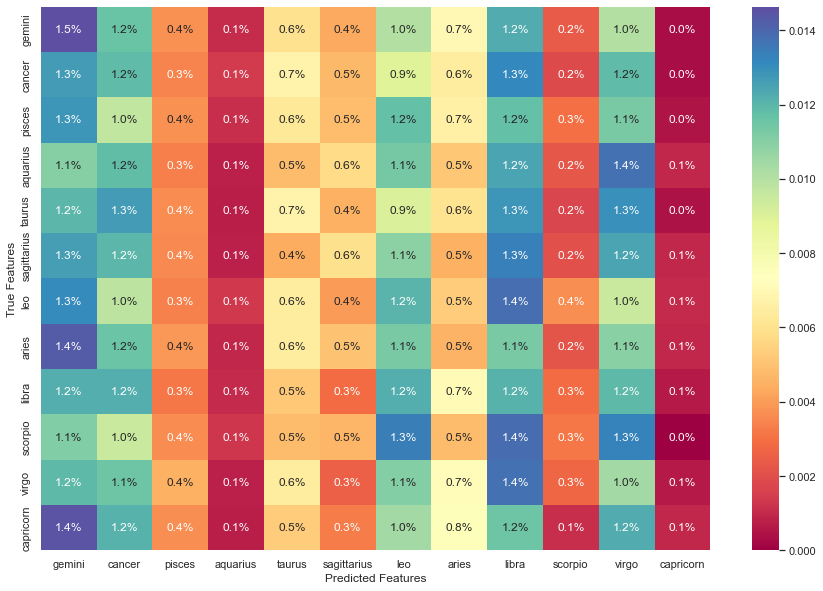

In [100]:
conf_mat2 = confusion_matrix(NB_labels_test, classifier.predict(NB_test_counts), normalize='true')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat2/np.sum(conf_mat2), annot=True, fmt = '.1%', cmap = 'Spectral', xticklabels=zodiac_list, yticklabels=zodiac_list)
plt.xlabel('Predicted Features')
plt.ylabel('True Features')
plt.show()